In [9]:
%reload_ext tikzmagic
%reload_ext nbtutor

# Le système d'exploitation

## Comment fonctionne un ordinateur ?

Les ordinateurs fonctionnent en représentant d'une façon physique (mais pas forcément visible, sauf pour ceux qui voient directement les tensions et charges dans un circuit électronique) des informations, et en ayant des mécanismes pour la circulation et la transformation de ces informations.

Quand les mécanismes sont paramétrables, on peut alors effectuer un algorithme quelconque : on a affaire à un ordinateur.

Depuis la deuxième guerre mondiale, les ordinateurs sont électroniques (à transistors depuis les années 50, à circuits intégrés depuis les années 70), mais il est possible d'en faire autrement (mécaniques, à eau, etc.).

La base de l'ordinateur étant très simple, il est possible de simuler des ordinateurs facilement : constructions dans Minecraft®, en Lego®, par des humains. Toutefois, l'une des forces des ordinateurs étant un fonctionnement très rapide, ces simulations restent peu utilisables.

On a un ordinateur dès lors qu'on a une mémoire et une unité de traitement. On peut y ajouter divers dispositifs d'entrée/sortie : clavier, écran, senseurs divers, circuits de commande, interfaces réseau, etc.

### Le cycle élémentaire

Les ordinateurs les plus simples fonctionnent à partir d'éléments simples et d'un cycle basique qui est immuable. Le reste sont des variations plus ou moins compliquées sur ce cycle.



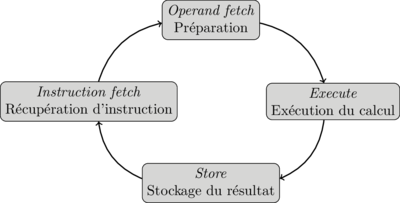

In [6]:
%%tikz

\tikzstyle{every node}=[text centered,align=center,fill=black!20,draw=black,rounded corners]
\tikzstyle{edgy}=[<-,thick,bend right]

\node (a) at (-3,0) {\emph{Instruction fetch} \\ Récupération d'instruction};
\node (b) at (0,2) {\emph{Operand fetch} \\ Préparation}
      edge [edgy] (a);
\node (c) at (3,0) {\emph{Execute} \\ Exécution du calcul}
     edge [edgy] (b);
\node (d) at (0,-2) {\emph{Store} \\ Stockage du résultat}
     edge [edgy] (c);
\draw (a) edge [edgy] (d);


Pour comprendre ce fonctionnement élémentaire, nous allons imaginer un ordinateur simplissime.

Cet ordinateur a 4 registres, des zones d'information pouvant contenir un entier et un seul.
Il a une mémoire, plus grande, dont chaque cas peut aussi contenir un entier.

Son unité arithmétique et logique est capable de faire trois opérations : addition, multiplication et soustraction.

Les seules instructions qu'il comprend sont donc:

| Instruction | Opérande 1|Opérande 2|Opérande 3|Signification    |
|-------------|-----------|----------|--------|-------------------|
|  STOP       |  - | - | - | Arrête la machine|
|  LOAD       | adresse A | N° reg. I| | R[I]←MEM[A] |
|  STORE      | adresse A | N° reg. I| | MEM[A]←R[I] |
|  PUT        | entier E  | N° reg. I| | R[I]←E |
|  ADD        | N° reg. I1 | N° reg. I2| N° reg. I3| R[I3]←R[I1]+R[I2]|
|  SUB        | N° reg. I1 | N° reg. I2| N° reg. I3| R[I3]←R[I1]-R[I2]|
|  MUL        | N° reg. I1 | N° reg. I2| N° reg. I3| R[I3]←R[I1]×R[I2]|
|  CPM0       | adresse d'instruction A | N° reg. I1| - | PC←A si R[I1]=0 |
|  GOTO       | adresse d'instruction A | - | - | PC←A |


Comment peut-on faire une addition simple de deux cases en mémoire (par exemple cases 0 et 1) ?

Il suffit d'utiliser le programme suivant :

    LOAD 0,#1
    LOAD 1,#2
    ADD #1,#2,#3
    STORE 2,#3
    STOP

Ce programme permet de charger depuis la mémoire les deux nombres dans les registres R1 et R2, de les additionner. Le résultat dans R3 est ensuite mis dans la case mémoire numéro 2.

Ce genre de langage est suffisamment simple pour être transcris en automatismes électroniques. Mais il est aussi suffisamment expressif pour permettre de faire des calculs compliqués. 

Le programme suivant permet de suivre le déroulement du programme tel qu'il se produit dans le processeur.

In [10]:
%%nbtutor -r -f -i

r=[0,0,0,0]
pc=0
next=0
phase="Booting"
mem=[2,4]+[0]*14
memi=[["LOAD","0","1"],["LOAD","1","2"],["ADD","1","2","3"],["STORE","2","3"],["STOP"]]

# Un programme pour calculer la factorielle de MEM[1]

# memi=[
#     ["PUT","1","1"],
#     ["STORE","2","1"], # MEM[2]=1
#     ["STORE","3","1"], # MEM[3]=1    
#     ["LOAD","2","1"],  
#     ["LOAD","3","2"],  
#     ["MUL", "1", "2", "3"],
#     ["STORE", "3", "3"], # MEM[2]←MEM[2]*MEM[3]
#     ["PUT","1","1"],
#     ["ADD","1","2","3"],
#     ["STORE","3","3"],  # MEM[3]=MEM[3]+1
#     ["LOAD","1","0"],
#     ["SUB", "3", "0", "3"],
#     ["CMP0", "14", "3"],      # IF MEM[2]==MEM[1], GOTO STOP
#     ["GOTO","3"],
#     ["STOP"]
# ]

val1=0
val2=0
result=0

# LOAD PUT STORE ADD MUL SUB CMP0 GOTO
# LOAD charge depuis la mémoire dans un registre
# PUT met un entier dans un registre
# STORE met depuis un registre dans la mémoire
# ADD MUL et SUB font des opérations entre deux registres et mettent le résultat dans un registre
# CMP0 va à une adresse si deux registres sont égaux
# GOTO va a une adresse
# STOP arrête la machine

while True:
    phase="Instruction"
    inst=memi[pc]
    codeop=inst[0]
    if len(inst)>1:
        argone=inst[1]
    if len(inst)>2:
        argtwo=inst[2]
    if len(inst)>3:
        argthree=inst[3]
    else:
        argthree="-"
    phase="Preparation"
    if codeop=="LOAD":
        val1=mem[int(argone)]
    if codeop=="STORE":
        val1=r[int(argtwo)]
    if codeop=="ADD" or codeop=="SUB" or codeop=="MUL":
        val1=r[int(argone)]
        val2=r[int(argtwo)]
    if codeop=="PUT":
        val1=int(argone)
    if codeop=="GOTO":
        val1=int(argone)
    if codeop=="CMP0":
        val1=int(argone)
        val2=r[int(argtwo)]
    if codeop=="STOP":
        break

    phase="Execution"
    next=pc+1
    if codeop=="ADD":
        result=val1+val2
    if codeop=="SUB":
        result=val1-val2
    if codeop=="MUL":
        result=val1*val2
    if codeop=="LOAD" or codeop=="STORE" or codeop=="PUT":
        result=val1
    if codeop=="GOTO":
        next=val1
    if codeop=="CMP0":
        if val2==0:
            next=val1


    phase="Store"
    if codeop=="LOAD" or codeop=="PUT":
        r[int(argtwo)]=result
    if codeop=="STORE":
        mem[int(argone)]=result
    if codeop=="ADD" or codeop=="MUL" or codeop=="SUB":
        r[int(argthree)]=result
    pc=next
    
print("OK")
print(mem)

## Évolution des mécanismes

Évidemment, un langage aussi rudimentaire paraît ne pas pouvoir faire tout ce que l'on voit sur nos écrans.

Pourtant, c'est bien un langage assez similaire qui permet tous les usages actuels de l'informatique. Le cycle vital du processeur n'a que très peu de modifications.

Ce modèle correspond bien au fonctionnement d'un ordinateur qui exécute un unique programme. Mais de nos jours, ce n'est pas le cas ! La plupart des ordinateurs fonctionnent toujours avec un **processeur** et une **mémoire**, mais ils font tourner plusierurs programmes simultanément.

### Le pont fragile

Comment faire pour faire tourner plusieurs programmes simultanément ?

Racontons donc une petite histoire :

> Le pont de la mort est un pont très fragile. Il ne supporte que 65 kg de charge simultanée,
> et cassera après le premier passage de quelqu'un ou quelque chose dessus.
> L'acrobate pèse 63 kg, mais il voudrait passer avec 3 tonnelets d'un kg chacun.
> Les tonnelets ne peuvent pas être lancés directement d'un côté à l'autre du pont.
> **Comment peut-il faire ?**

Évidemment, cette énigme très connue a une solution simple : il suffit de jongler entre les différents tonnelets pour donner l'impression qu'il n'y a qu'un tonnelet au plus en même temps, et ainsi franchir le pont de la mort.

C'est le même genre de méthodes qui est utilisé pour donner l'illusion qu'un ordinateur fait tourner plusieurs programmes en même temps. Des mécanismes permettent, après un certain temps maximal, d'interrompre le déroulement normal d'un programme, de faire une copie des registres, et de passer à *autre chose* : un autre programme, par exemple, ou des tâches de gestion communes. Évidemment, ce mécanisme de gestion (à part la partie horloge qui signale le temps écoulé) dans le même langage rudimentaire. De plus, le système doit également s'assurer que lorsqu'un programme reprend ses fonctions, il récupère les bonnes données. C'est là qu'intervient le rôle du *système d'exploitation*, un programme exécuté par l'ordinateur pour gérer les interactions entre toutes les autres applications.


### Le système d'exploitation 

Le système d'exploitation **gère l'accès aux matériel de l'ordinateur** pour les applications. On peut distinguer trois grandes catégories de matériel:

  * les moyens de calcul (processeur, co-processeur, etc.)
  * la mémoire (mémoire RAM, mais aussi d'autres éléments)
  * les périphériques, qui eux-même peuvent être mis en trois groupes non exhaustif:
    * les périphériques de saisie ou d'affichage
    * les périphériques de communication
    * les périphériques de stockage

Le système d'exploitation a aussi un rôle (plus ou moins développé) de **fourniture d'interface unifiée aux applications** pour le contrôle des éléments ci-dessus, ainsi que pour des éléments d'interface communs à toutes les applications : *systèmes de fichiers*, *systèmes de communication*, *permissions des utilisateurs*, *interface graphique*.

Certains éléments parmi ces derniers sont parfois optionnels (ou substituables par d'autres) : par exemple, le système Linux, conçu par plusieurs équipes, a plusieurs systèmes d'interface graphique indépendants, et le cœur du système fournit une interface pour les interfaces graphiques plutôt qu'une interface graphique finalisée.

Pour les moyens de calcul, le système d'exploitation doit **gérer en particulier l'accès au processeur** par le partage de temps entre les applications (et le système proprement dit), notamment par le système des **interruptions** évoqué plus haut.

Pour la mémoire, il y a plusieurs tâches importantes mais le système d'exploitation doit gérer deux systèmes importants:
  * la réservation de la mémoire
  * l'accès à la mémoire via l'adressage virtuel

La réservation de la mémoire consiste en l'attribution de zones de mémoire à chaque application à la demande, de tenir le compte de si elles sont occupées ou pas, et de les remettre libre lorsque l'application déclare ne plus en avoir besoin. L'adressage virtuel est une renumérotation de la mémoire pour permettre aux applications d'avoir l'impression qu'elles ont toutes la mémoire pour elles seules... tant qu'elles n'essayent pas de l'utiliser en entier.

Quant aux périphériques, ils sont contrôlés à deux niveaux : des fois de façon autonome par le matériel en utilisant une interface connue (par exemple le protocole USB) en parlant à un circuit spécialisé de l'ordinateur : *le contrôleur*, des fois de façon explicite entièrement guidé par le processeur, et le plus souvent par une combinaison des deux. Lorsqu'une partie logicielle doit être exécutée non pas par le processeur central, mais par le périphérique lui-même, on parle de *firmware*. Lorsqu'une partie logicielle doit être exécutée par le processeur central, on parle de *pilote* (ou *driver*). Par abus de langage, on confond parfois tous ces mots (les *pilotes* livrés avec un matériel comprennent aussi le firmware et même parfois des applications totalement indépendantes).

Les périphériques sont pilotés en deux modes d'interaction principaux selon leur autonomie et surtout leur vitesse de transfert. Les plus rapides sont en mode programmé avec un contrôleur évolué à qui on donne des ordres et qui agit de façon autonome ; le système vérifie périodiquement l'état de l'exécution pour savoir ce qui est terminé. Le plus lents sont en mode piloté par interruptions ; lorsqu'un transfert a lieu, le même mécanisme d'interruption qui sert à passer d'un applicatif à un autre permet de passer au système pour que celui-ci traite les données qui arrivent (ou doivent partir).
